In [69]:
%pylab inline
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['box']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Understanding Figure 2 of Gary M. Bernstein & Daniel Gruen 2014 article
https://arxiv.org/pdf/1401.2636.pdf

In [70]:
import matplotlib.gridspec as gridspec
params = {'legend.fontsize':14,
          'figure.figsize': (6, 6),
         'axes.labelsize': 16,
         'axes.titlesize': 16,
         'xtick.labelsize':16,
         'ytick.labelsize': 16}
pylab.rcParams.update(params)

In [71]:
# Kernel in 1D
from interp1DKernels import *

In [72]:
# Periodic kernel 1D to approx Sinc-periodic
from periodicKernel import *  

In [73]:
# Bernstein & Gruen  DFT and inverse DFT using numpy.fft code
from BG_DFT_impl import *

# Utils

In [74]:
# padding
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10.)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

In [75]:
# cropping
def crop_at(img,cropx,cropy,off7x=0,off7y=0):
    y,x = img.shape
    startx = x//2-(cropx//2)+off7x
    starty = y//2-(cropy//2)+off7y
    return img[starty:starty+cropy,startx:startx+cropx]

In [76]:
#clean too low flaot : here to delete imaginary part
def clean_tiny_cplx(x, tol=1e-12):
  tol = tol/ np.finfo(float).eps
  x = np.real_if_close(x,tol=tol)
  return x

# Make a bullseye 32x32

In [92]:
Nin = 32
f = 2./Nin
imgOrig = np.zeros((Nin,Nin),dtype=float)
def trig(x):
    mask1 = 3*x<1.
    mask2 = 3*x>=2.
    mask3 = 3*x<3.
    if mask1|(mask2&mask3):
        return 1.
    else:
        return 0.
for iy in range(-Nin//2,Nin//2):
    for ix in range(-Nin//2,Nin//2):
        fx = f*ix
        fy = f*iy
        rad = np.sqrt(fx**2+fy**2)
        imgOrig[ix+15,iy+15]=trig(rad)

In [86]:
imgOrig2 = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
  0.0, 0.0, 0.0, 0.0,],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15294118,
  0.40392157, 0.6431373, 0.7647059, 0.84313726, 0.84313726, 0.7647059,
  0.6431373, 0.40392157, 0.15294118, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
  0.0, 0.0, 0.0, 0.0,],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003921569, 0.30588236,
  0.7647059, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7647059,
  0.30588236, 0.003921569, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15294118, 0.8117647, 1.0, 1.0,
  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8117647,
  0.15294118, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.34901962, 0.9529412, 1.0, 1.0, 1.0,
  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
  0.9529412, 0.34901962, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.4745098, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
  0.4745098, 0.0, 0.0, 0.0, 0.0, 0.0,],
 [0.0, 0.0, 0.0, 0.0, 0.30588236, 0.99607843, 1.0, 1.0, 1.0, 1.0, 1.0,
  1.0, 0.78039217, 0.43529412, 0.23921569, 0.12156863, 0.12156863,
  0.23921569, 0.43529412, 0.78039217, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
  0.99607843, 0.30588236, 0.0, 0.0, 0.0, 0.0,],
 [0.0, 0.0, 0.0, 0.16470589, 0.9490196, 1.0, 1.0, 1.0, 1.0, 1.0,
  0.7882353, 0.22352941, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
  0.22352941, 0.7882353, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9490196, 0.16470589,
  0.0, 0.0, 0.0,],
 [0.0, 0.0, 0.0, 0.7921569, 1.0, 1.0, 1.0, 1.0, 1.0, 0.627451,
  0.02745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
  0.02745098, 0.627451, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7921569, 0.0, 0.0,
  0.0,],
 [0.0, 0.0, 0.24313726, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5803922, 0.0, 0.0,
  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5803922,
  1.0, 1.0, 1.0, 1.0, 1.0, 0.23921569, 0.0, 0.0,],
 [0.0, 0.0, 0.6901961, 1.0, 1.0, 1.0, 1.0, 0.85882354, 0.03529412, 0.0,
  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
  0.03529412, 0.85882354, 1.0, 1.0, 1.0, 1.0, 0.6901961, 0.0, 0.0,],
 [0.0, 0.13725491, 0.99215686, 1.0, 1.0, 1.0, 0.99607843, 0.23529412,
  0.0, 0.0, 0.0, 0.0, 0.0, 0.25490198, 0.7058824, 0.9098039, 0.9098039,
  0.7058824, 0.25490198, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23529412, 0.99607843,
  1.0, 1.0, 1.0, 0.99215686, 0.13725491, 0.0,],
 [0.0, 0.38039216, 1.0, 1.0, 1.0, 1.0, 0.8117647, 0.0, 0.0, 0.0, 0.0,
  0.0, 0.47058824, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.47058824, 0.0, 0.0,
  0.0, 0.0, 0.0, 0.8117647, 1.0, 1.0, 1.0, 1.0, 0.38039216, 0.0,],
 [0.0, 0.5254902, 1.0, 1.0, 1.0, 1.0, 0.54901963, 0.0, 0.0, 0.0, 0.0,
  0.25490198, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.25490198, 0.0,
  0.0, 0.0, 0.0, 0.54901963, 1.0, 1.0, 1.0, 1.0, 0.5254902, 0.0,],
 [0.0, 0.6666667, 1.0, 1.0, 1.0, 1.0, 0.28627452, 0.0, 0.0, 0.0, 0.0,
  0.7058824, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7058824, 0.0, 0.0,
  0.0, 0.0, 0.28627452, 1.0, 1.0, 1.0, 1.0, 0.6666667, 0.0,],
 [0.0, 0.8117647, 1.0, 1.0, 1.0, 1.0, 0.14901961, 0.0, 0.0, 0.0, 0.0,
  0.9098039, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9098039, 0.0, 0.0,
  0.0, 0.0, 0.15294118, 1.0, 1.0, 1.0, 1.0, 0.80784315, 0.0,],
 [0.0, 0.80784315, 1.0, 1.0, 1.0, 1.0, 0.23529412, 0.0, 0.0, 0.0, 0.0,
  0.9098039, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9098039, 0.0, 0.0,
  0.0, 0.0, 0.23529412, 1.0, 1.0, 1.0, 1.0, 0.80784315, 0.0,],
 [0.0, 0.6666667, 1.0, 1.0, 1.0, 1.0, 0.32156864, 0.0, 0.0, 0.0, 0.0,
  0.7058824, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7058824, 0.0, 0.0,
  0.0, 0.0, 0.32156864, 1.0, 1.0, 1.0, 1.0, 0.6666667, 0.0,],
 [0.0, 0.52156866, 1.0, 1.0, 1.0, 1.0, 0.44705883, 0.0, 0.0, 0.0, 0.0,
  0.25490198, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.25490198, 0.0,
  0.0, 0.0, 0.0, 0.44705883, 1.0, 1.0, 1.0, 1.0, 0.52156866, 0.0,],
 [0.0, 0.38039216, 1.0, 1.0, 1.0, 1.0, 0.8392157, 0.003921569, 0.0, 0.0,
  0.0, 0.0, 0.47058824, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.47058824, 0.0,
  0.0, 0.0, 0.0, 0.003921569, 0.8392157, 1.0, 1.0, 1.0, 1.0, 0.38039216,
  0.0,],
 [0.0, 0.13725491, 0.99215686, 1.0, 1.0, 1.0, 1.0, 0.29803923, 0.0, 0.0,
  0.0, 0.0, 0.0, 0.25490198, 0.7058824, 0.9098039, 0.9098039, 0.7058824,
  0.25490198, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29803923, 1.0, 1.0, 1.0, 1.0,
  0.99215686, 0.13725491, 0.0,],
 [0.0, 0.0, 0.6901961, 1.0, 1.0, 1.0, 1.0, 0.78039217, 0.019607844, 0.0,
  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
  0.019607844, 0.78431374, 1.0, 1.0, 1.0, 1.0, 0.6901961, 0.0, 0.0,],
 [0.0, 0.0, 0.24313726, 1.0, 1.0, 1.0, 1.0, 1.0, 0.64705884, 0.003921569,
  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
  0.003921569, 0.64705884, 1.0, 1.0, 1.0, 1.0, 1.0, 0.23921569, 0.0, 0.0,],
 [0.0, 0.0, 0.0, 0.7921569, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5803922,
  0.015686275, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
  0.015686275, 0.5803922, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7921569, 0.0, 0.0,
  0.0,],
 [0.0, 0.0, 0.0, 0.16470589, 0.9490196, 1.0, 1.0, 1.0, 1.0, 1.0,
  0.81960785, 0.23137255, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
  0.23137255, 0.81960785, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9490196, 0.16470589,
  0.0, 0.0, 0.0,],
 [0.0, 0.0, 0.0, 0.0, 0.30588236, 0.99607843, 1.0, 1.0, 1.0, 1.0, 1.0,
  0.99607843, 0.76862746, 0.45490196, 0.22352941, 0.1254902, 0.1254902,
  0.22352941, 0.45490196, 0.76862746, 0.99607843, 1.0, 1.0, 1.0, 1.0,
  1.0, 0.99607843, 0.30588236, 0.0, 0.0, 0.0, 0.0,],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.4745098, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
  0.4745098, 0.0, 0.0, 0.0, 0.0, 0.0,],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.34901962, 0.9529412, 1.0, 1.0, 1.0,
  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
  0.9529412, 0.34901962, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15294118, 0.8117647, 1.0, 1.0,
  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8117647,
  0.15294118, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003921569, 0.30588236,
  0.7647059, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7647059,
  0.30588236, 0.003921569, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15294118,
  0.40392157, 0.6431373, 0.7647059, 0.84313726, 0.84313726, 0.7647059,
  0.6431373, 0.40392157, 0.15294118, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
  0.0, 0.0, 0.0, 0.0,],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
  0.0, 0.0, 0.0, 0.0,]],dtype=float)

In [87]:
imgOrig2[imgOrig2>0.000001]=1

In [84]:
def plotImg(img,fig, title=None, vmin=None, vmax=None):
    ax = axes()
    im = imshow(img, cmap='gray_r',vmin=vmin, vmax = vmax)
    plt.title(title)
    # Create new axes according to image position
    cax = fig.add_axes([ax.get_position().x1+0.01,
                    ax.get_position().y0,
                    0.05,
                    ax.get_position().height])
 
    # Plot vertical colorbar
    colorbar(im, cax=cax)

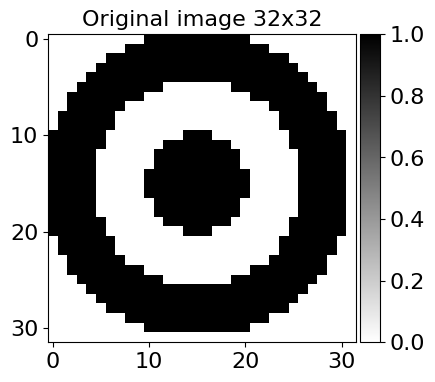

In [93]:
fig = figure(figsize=(4,4))
plotImg(imgOrig,fig, title="Original image 32x32")

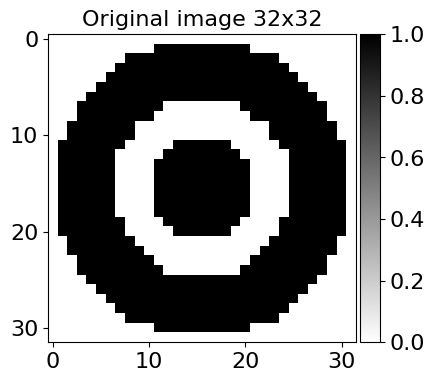

In [89]:
fig = figure(figsize=(4,4))
plotImg(imgOrig2,fig, title="Original image 32x32")

#  Pad to get a 128x128 image before x->u DFT

In [94]:
orig_pad_128 = np.pad(imgOrig, (128-32)//2, pad_with, padder=0.)

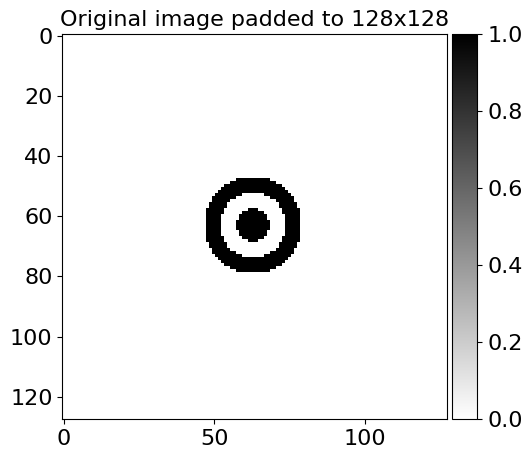

In [95]:
fig = figure(figsize=(5,5))
plotImg(orig_pad_128,fig,title="Original image padded to 128x128")

# Paper Eq 9 in 2D

In [96]:
# specific for the periodic cardinal sinus (the best)
def fhat2DSincWrapped(img,u1,u2):
  # apply DFT to img
  N1,N2 = img.shape
  atildekl = npdft2Dshift(img) # formule (6) of fourier coeff in 2D
  mtx1 = np.array([KuSincWrapped(u-k1/N1,N1) for k1 in range(-N1//2,N1//2) for u in u1]).reshape(N1,-1)
  mtx2 = np.array([KuSincWrapped(v-k2/N2,N2) for k2 in range(-N2//2,N2//2) for v in u2]).reshape(N2,-1)
  #print(mtx1.shape,fkl. shape,mtx2.shape)
  return mtx1.T @ atildekl @ mtx2    # Formule (9) in 2D

In [97]:
# Generic case
def fhatKernel(img,u1,u2,kerWrapped):
  # apply DFT to img
  N1,N2 = img.shape
  atildekl = npdft2Dshift(img) # formule (6) of fourier coeff in 2D
  mtx1 = np.array([kerWrapped(u-k1/N1,N1) for k1 in range(-N1//2,N1//2) for u in u1]).reshape(N1,-1)
  mtx2 = np.array([kerWrapped(v-k2/N2,N2) for k2 in range(-N2//2,N2//2) for v in u2]).reshape(N2,-1)
  #print(mtx1.shape,fkl. shape,mtx2.shape)
  return mtx1.T @ atildekl @ mtx2    # Formule (9) in 2D

# Define a new u-grid for Fourier resampling 

In [98]:
N1pad,N2pad = orig_pad_128.shape
assert N1pad==N2pad, "we suppose after that height = width"
Npad = N1pad
Npad

128

In [99]:
M=Npad*4 #  width/height of the final image (Figure 2 if bulleteyes is 32x32)
dx=1
du = 1/(M*dx)
umax = (M/2)*du
umax,du

(0.5, 0.001953125)

In [100]:
u1=np.arange(-umax,umax,du)
u2=np.arange(-umax,umax,du)

# TF[Kx] kernel matrix in 2D Fourier grid
$K_x(x)$ is the  Lanczos 3rd order renormalized (see interp1DKernels.py). 
$\hat{K}_x(u)$ notation for the Fourier transform 

In [101]:
#generic
def Kxhat2D(u1,u2,ker):
  # warning interpolation regular integer grid
  return np.array([ker(u)*ker(v) for u in u1 for v in u2]).reshape(u1.shape[0],u2.shape[0])

In [102]:
# take a little as this is not optimized
Kxhat_mtx = Kxhat2D(u1,u2,hatlanczos3)

# What is the result if  Ku is the "ideal" Sinc-periodic kernel?

## Eqs 7-9 : Fourier Transform of $f_d(x)$
$$
\hat{f}_d(u) = \sum_{k=-N/2}^{N/2-1} \hat{a}_k  K_u(u-k/N)
$$

In [103]:
fhat_mtx_ideal = fhat2DSincWrapped(orig_pad_128,u1,u2)

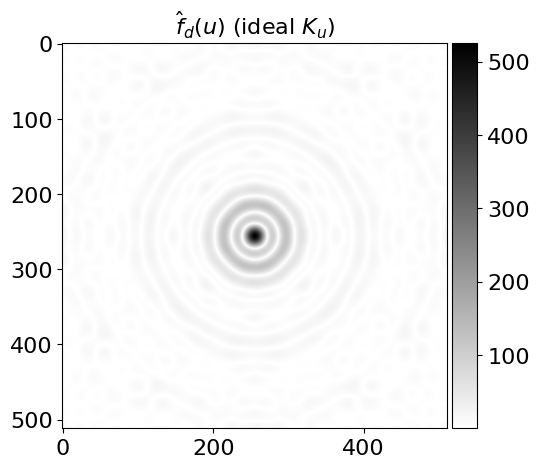

In [104]:
fig = figure(figsize=(5,5))
plotImg(np.abs(fhat_mtx_ideal),fig,title="$\hat{f}_d(u)$ (ideal $K_u$)")

## Eq. 11: convolution in Fourier space $\hat{F}(u) = \hat{K}_x(u) \times \hat{f}_d(u)$

In [105]:
Fhat_mtx_ideal = Kxhat_mtx * fhat_mtx_ideal

## $F(x)$ as inverse transform of $\hat{F}(u)$

In [106]:
F_real_ideal = npinvdft2Dshift(Fhat_mtx_ideal)

## cleaning for small numbers

In [107]:
F_real_ideal = clean_tiny_cplx(F_real_ideal)
F_real_ideal[np.abs(F_real_ideal)<1e-12]=0.

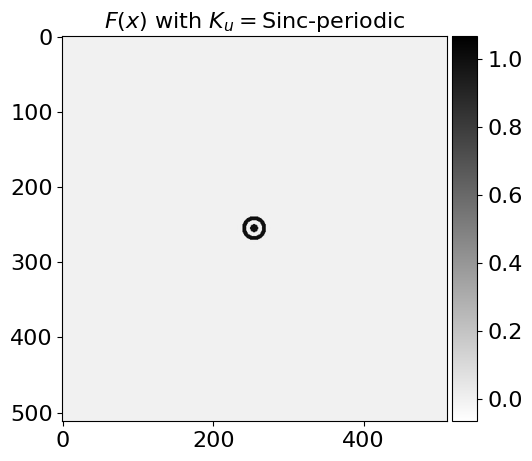

In [108]:
fig = figure(figsize=(5,5))
plotImg(F_real_ideal,fig,title=r"$F(x)$ with $K_u=$Sinc-periodic")

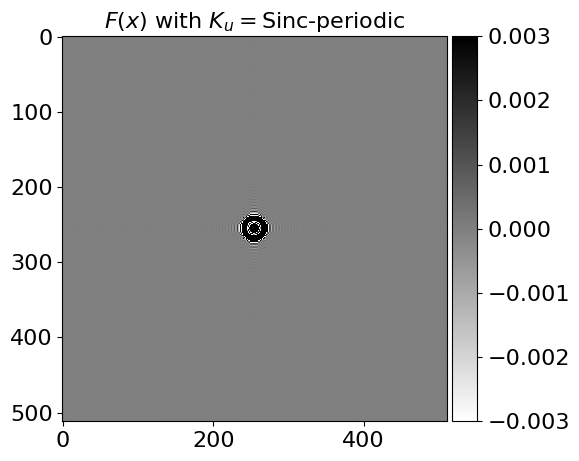

In [109]:
fig = figure(figsize=(5,5))
plotImg(F_real_ideal,fig,title=r"$F(x)$ with $K_u=$Sinc-periodic",
        vmin=-0.003,vmax=0.003)

# Replace ideal $K_u$ kernel by lanczos3 (renormalized) periodic

In [110]:
fhat_lanczos3_mtx = fhatKernel(orig_pad_128,u1,u2,lanczosRenorm3Wrapped)

In [111]:
Fhat_lanczos3_mtx = Kxhat_mtx * fhat_lanczos3_mtx

In [112]:
F_lanczos3_real = npinvdft2Dshift(Fhat_lanczos3_mtx)

In [113]:
F_lanczos3_real = clean_tiny_cplx(F_lanczos3_real)
F_lanczos3_real[np.abs(F_lanczos3_real)<1e-12]=0.

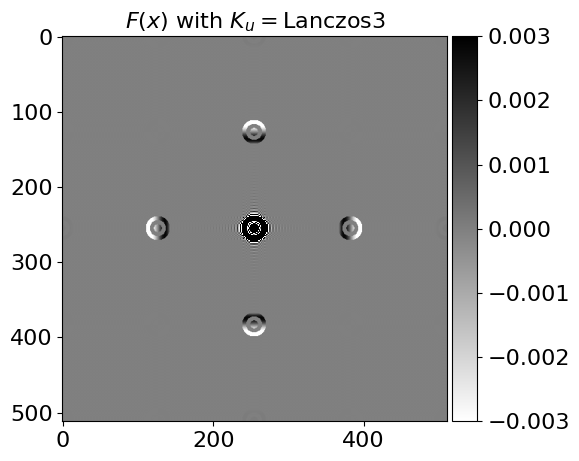

In [114]:
fig = figure(figsize=(5,5))
plotImg(F_lanczos3_real,fig,title=r"$F(x)$ with $K_u=$Lanczos3",
        vmin=-0.003,vmax=0.003)

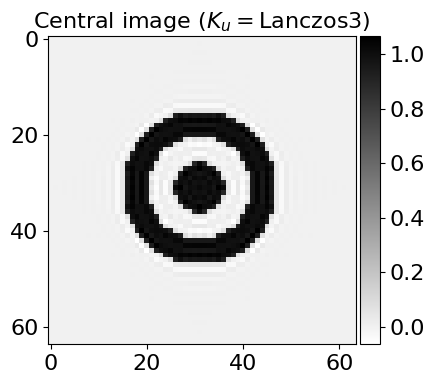

In [115]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_lanczos3_real,64,64),fig,
    title="Central image ($K_u=$Lanczos3)")

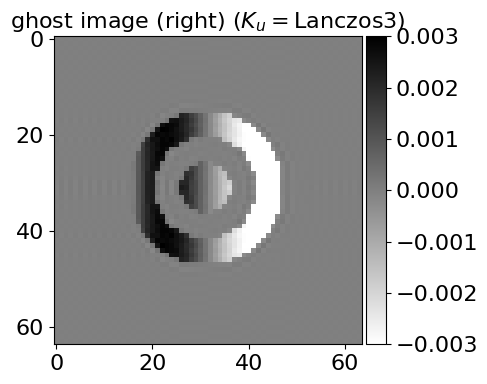

In [116]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_lanczos3_real,64,64,128,0),fig,vmin=-0.003,vmax=0.003,
    title="ghost image (right) ($K_u=$Lanczos3)")

# Replace ideal $K_u$ kernel by Cubic periodic

In [117]:
fhat_cubic_mtx = fhatKernel(orig_pad_128,u1,u2,cubicWrapped) # Ku = cubic

In [118]:
Fhat_cubic_mtx = Kxhat_mtx * fhat_cubic_mtx

In [119]:
F_cubic_real = npinvdft2Dshift(Fhat_cubic_mtx)

In [120]:
F_cubic_real = clean_tiny_cplx(F_cubic_real)
F_cubic_real[np.abs(F_cubic_real)<1e-12]=0.

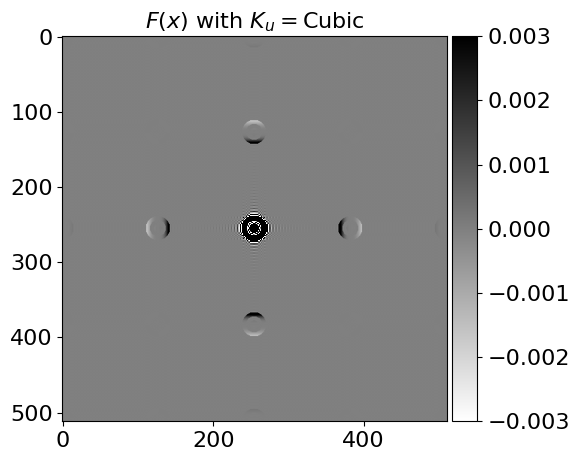

In [121]:
fig = figure(figsize=(5,5))
plotImg(F_cubic_real,fig,title=r"$F(x)$ with $K_u=$Cubic",
        vmin=-0.003,vmax=0.003)

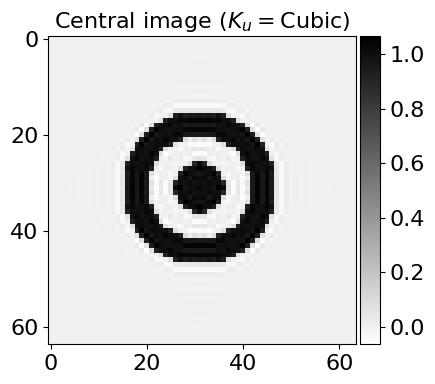

In [122]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_cubic_real,64,64),fig,
    title="Central image ($K_u=$Cubic)")

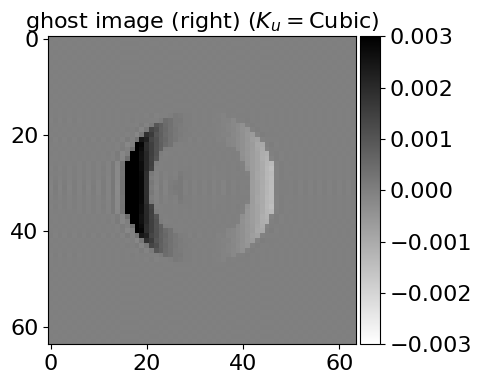

In [123]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_cubic_real,64,64,128,0),fig,vmin=-0.003,vmax=0.003,
    title="ghost image (right) ($K_u=$Cubic)")

# Replace ideal $K_u$ kernel by Quintic periodic (Bernstein & Gruen)

In [124]:
fhat_quinticBG_mtx = fhatKernel(orig_pad_128,u1,u2,quinticBGWrapped) # Ku = Quintic BG

In [125]:
Fhat_quinticBG_mtx = Kxhat_mtx * fhat_quinticBG_mtx

In [126]:
F_quinticBG_real = npinvdft2Dshift(Fhat_quinticBG_mtx)

In [127]:
F_quinticBG_real = clean_tiny_cplx(F_quinticBG_real)
F_quinticBG_real[np.abs(F_quinticBG_real)<1e-12]=0.

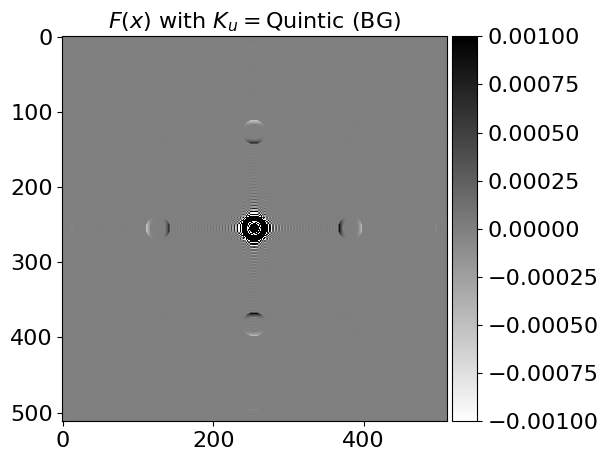

In [128]:
fig = figure(figsize=(5,5))
plotImg(F_quinticBG_real,fig,title=r"$F(x)$ with $K_u=$Quintic (BG)",
        vmin=-0.001,vmax=0.001)

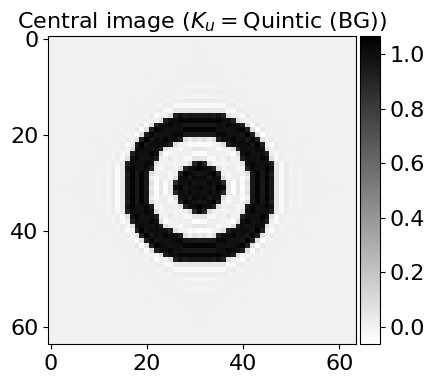

In [129]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_quinticBG_real,64,64),fig,
    title="Central image ($K_u=$Quintic (BG))")

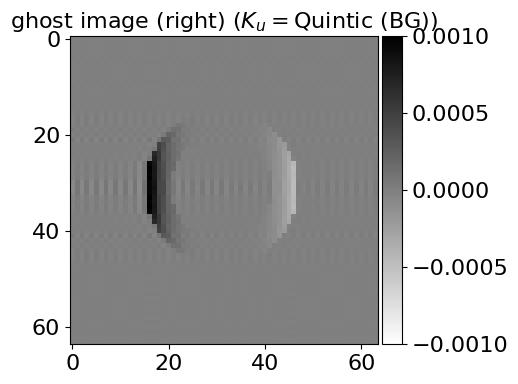

In [130]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_quinticBG_real,64,64,128,0),fig,vmin=-0.001,vmax=0.001,
    title="ghost image (right) ($K_u=$Quintic (BG))")

# Replace ideal $K_u$ kernel by Quintic periodic (JE)

In [131]:
fhat_quinticJE_mtx = fhatKernel(orig_pad_128,u1,u2,quinticJEWrapped) # Ku = Quintic JE

In [132]:
Fhat_quinticJE_mtx = Kxhat_mtx * fhat_quinticJE_mtx

In [133]:
F_quinticJE_real = npinvdft2Dshift(Fhat_quinticJE_mtx)

In [134]:
F_quinticJE_real = clean_tiny_cplx(F_quinticJE_real)
F_quinticJE_real[np.abs(F_quinticJE_real)<1e-12]=0.

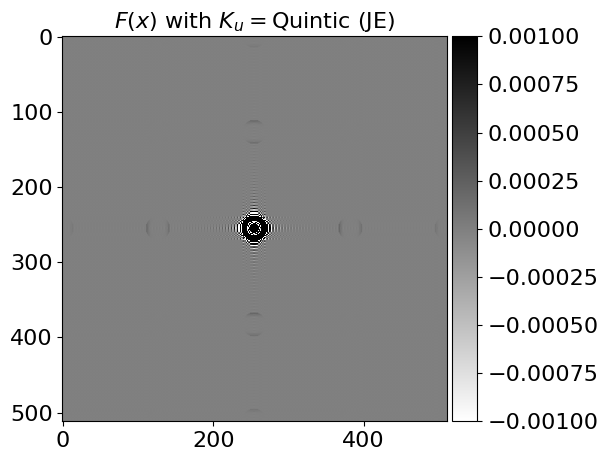

In [135]:
fig = figure(figsize=(5,5))
plotImg(F_quinticJE_real,fig,title=r"$F(x)$ with $K_u=$Quintic (JE)",
        vmin=-0.001,vmax=0.001)

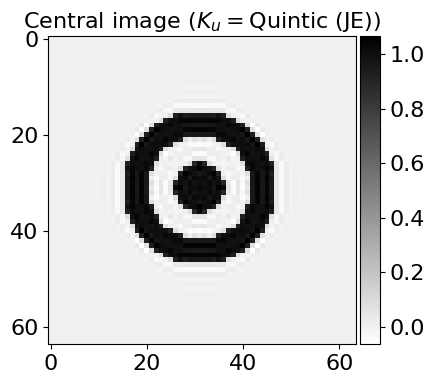

In [136]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_quinticJE_real,64,64),fig,
    title="Central image ($K_u=$Quintic (JE))")

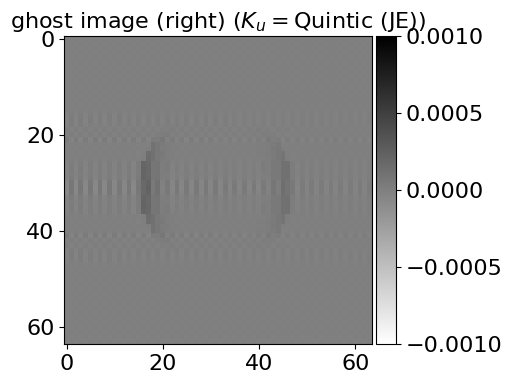

In [137]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_quinticJE_real,64,64,128,0),fig,vmin=-0.001,vmax=0.001,
    title="ghost image (right) ($K_u=$Quintic (JE))")

# F\<Kernel\> - F\<Sinc Periodic\> in real space (all and closeup on the central and 1st ghost right most)

In [138]:
# common LUT
vmin = -0.003 #-0.003
vmax = 0.003  #0.003

## Lanczos-3 norm

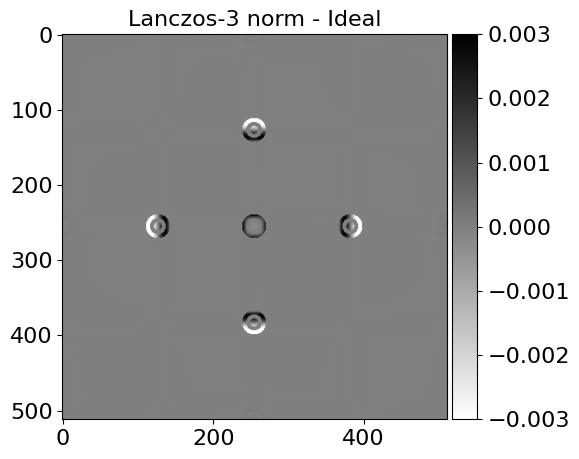

In [139]:
fig=figure(figsize=(5,5))
plotImg(F_lanczos3_real-F_real_ideal, fig,vmin=vmin, vmax=vmax, title="Lanczos-3 norm - Ideal")

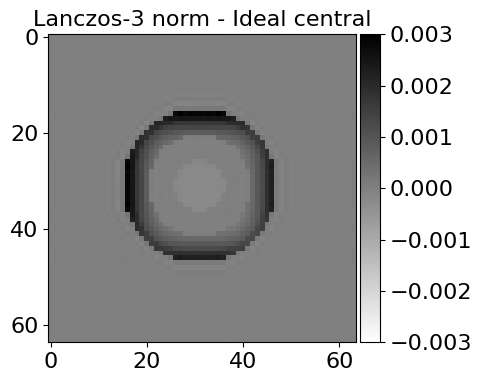

In [140]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_lanczos3_real-F_real_ideal,64,64),fig,vmin=vmin, vmax=vmax,\
    title="Lanczos-3 norm - Ideal central")

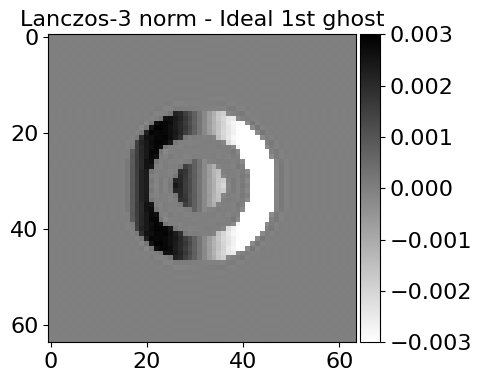

In [141]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_lanczos3_real-F_real_ideal,64,64,128,0),fig,vmin=vmin, vmax=vmax,\
    title="Lanczos-3 norm - Ideal 1st ghost")

## Cubic

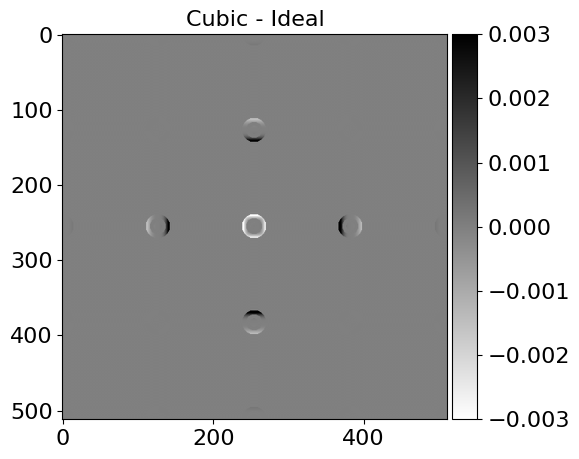

In [142]:
fig=figure(figsize=(5,5))
plotImg(F_cubic_real-F_real_ideal, fig,vmin=vmin, vmax=vmax, title="Cubic - Ideal")

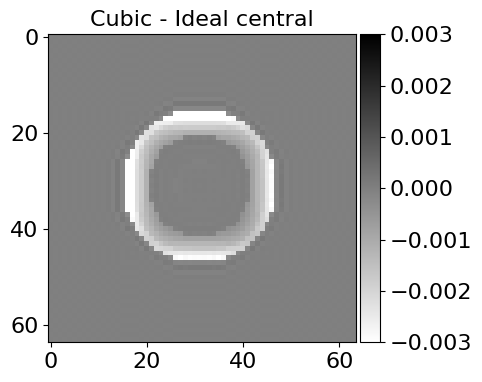

In [143]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_cubic_real-F_real_ideal,64,64),fig,vmin=vmin, vmax=vmax,\
    title="Cubic - Ideal central")

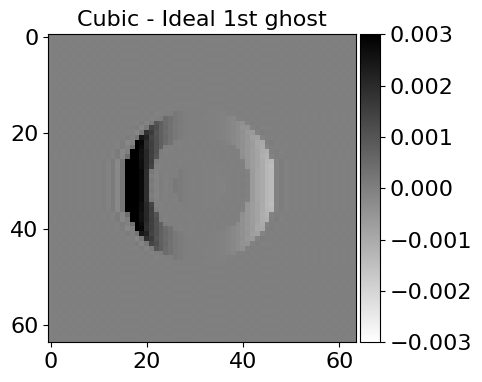

In [144]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_cubic_real-F_real_ideal,64,64,128,0),fig,vmin=vmin, vmax=vmax,\
    title="Cubic - Ideal 1st ghost")

## Quintic  (Bernstein & Gruen)

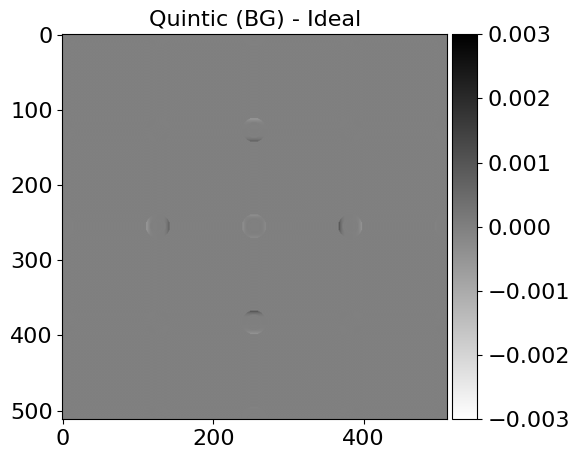

In [145]:
fig=figure(figsize=(5,5))
plotImg(F_quinticBG_real-F_real_ideal, fig,vmin=vmin, vmax=vmax, title="Quintic (BG) - Ideal")

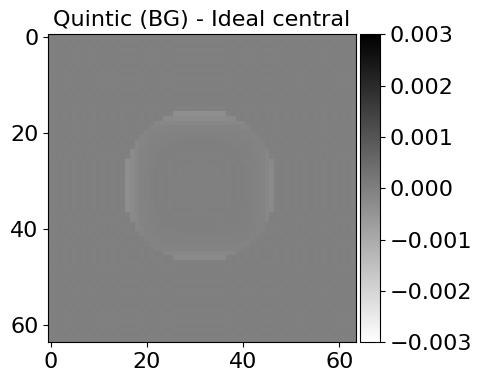

In [146]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_quinticBG_real-F_real_ideal,64,64),fig,vmin=vmin, vmax=vmax,\
    title="Quintic (BG) - Ideal central")

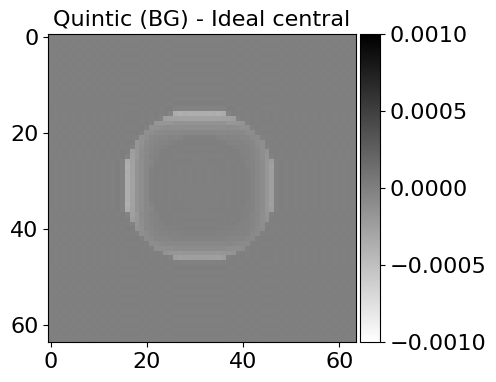

In [151]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_quinticBG_real-F_real_ideal,64,64),fig,vmin=-0.001, vmax=0.001,\
    title="Quintic (BG) - Ideal central")

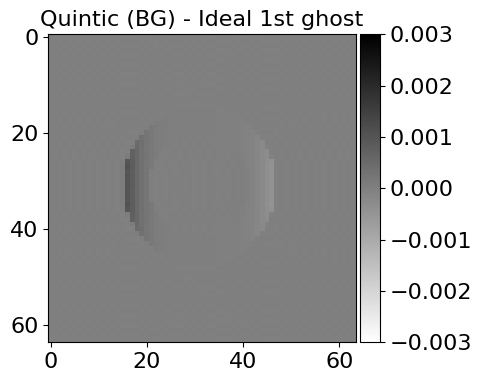

In [147]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_quinticBG_real-F_real_ideal,64,64,128,0),fig,vmin=vmin, vmax=vmax,\
    title="Quintic (BG) - Ideal 1st ghost")

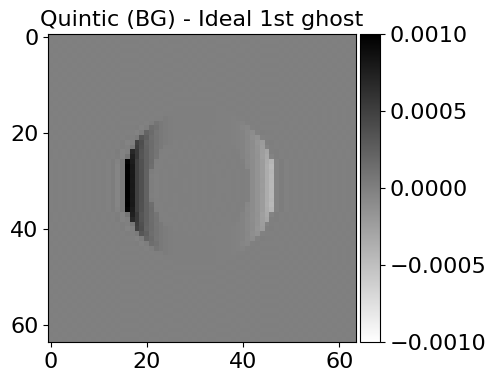

In [152]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_quinticBG_real-F_real_ideal,64,64,128,0),fig,vmin=-0.001, vmax=0.001,\
    title="Quintic (BG) - Ideal 1st ghost")

## Quintic  (JE)

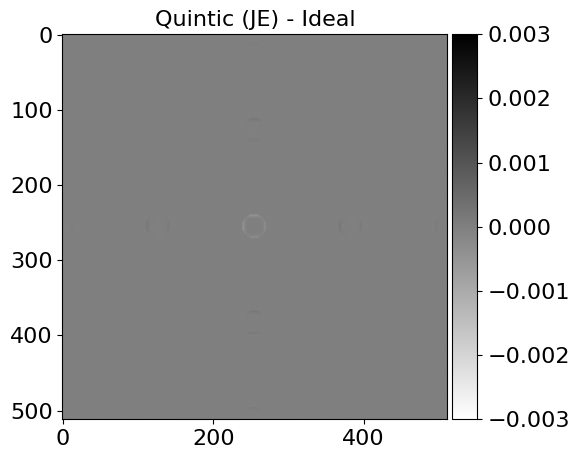

In [148]:
fig=figure(figsize=(5,5))
plotImg(F_quinticJE_real-F_real_ideal, fig,vmin=vmin, vmax=vmax, title="Quintic (JE) - Ideal")

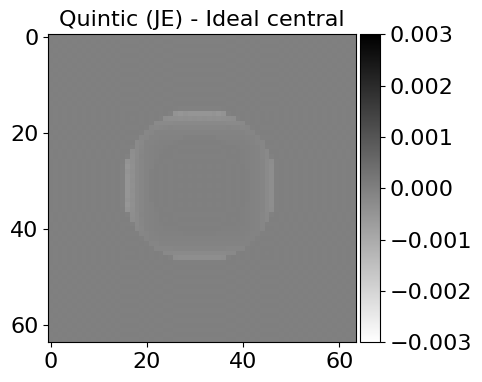

In [149]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_quinticJE_real-F_real_ideal,64,64),fig,vmin=vmin, vmax=vmax,\
    title="Quintic (JE) - Ideal central")

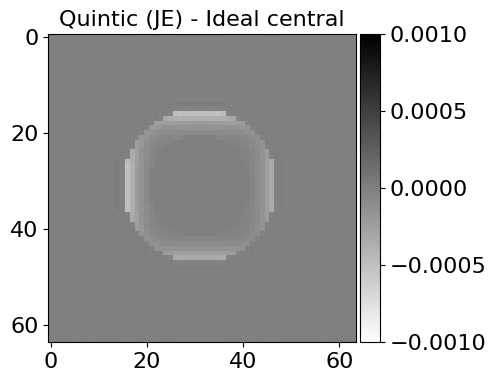

In [153]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_quinticJE_real-F_real_ideal,64,64),fig,vmin=-0.001, vmax=0.001,\
    title="Quintic (JE) - Ideal central")

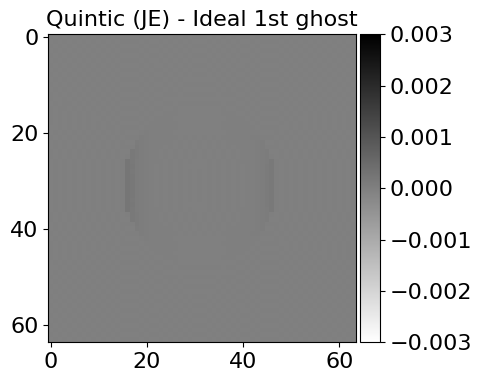

In [150]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_quinticJE_real-F_real_ideal,64,64,128,0),fig,vmin=vmin, vmax=vmax,\
    title="Quintic (JE) - Ideal 1st ghost")

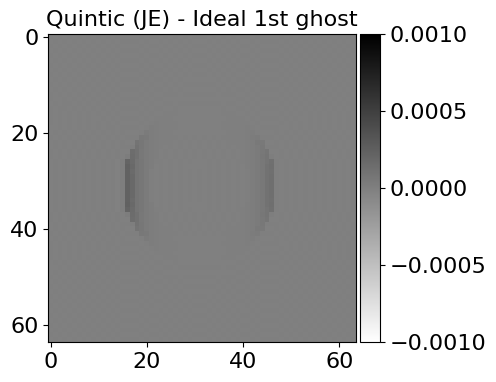

In [154]:
fig=figure(figsize=(4,4))
plotImg(crop_at(F_quinticJE_real-F_real_ideal,64,64,128,0),fig,vmin=-0.001, vmax=0.001,\
    title="Quintic (JE) - Ideal 1st ghost")